In [6]:
import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Make sure we can import from src/
project_root = Path("..").resolve()
sys.path.append(str(project_root))

from src.data_loader import load_returns_csv
from src.var_models import historical_var
from src.backtesting import (
    generate_var_series,
    count_exceptions,
    kupiec_pof_test,
    basel_traffic_light,
)
from src.report import generate_text_report

# Load the returns
returns = load_returns_csv(project_root / "data" / "sample_returns.csv")
returns.head()


date
2024-01-01    0.0023
2024-01-02   -0.0045
2024-01-03    0.0012
2024-01-04   -0.0031
2024-01-05    0.0007
Name: return, dtype: float64

In [7]:
alpha = 0.99

hist_var_series = generate_var_series(returns, alpha, historical_var, window=20)

num_exceptions, exceptions = count_exceptions(returns, hist_var_series)
lr_kupiec = kupiec_pof_test(exceptions, alpha)
zone = basel_traffic_light(num_exceptions)

num_exceptions, lr_kupiec, zone


(1, 2.8895869495102446, 'Green')

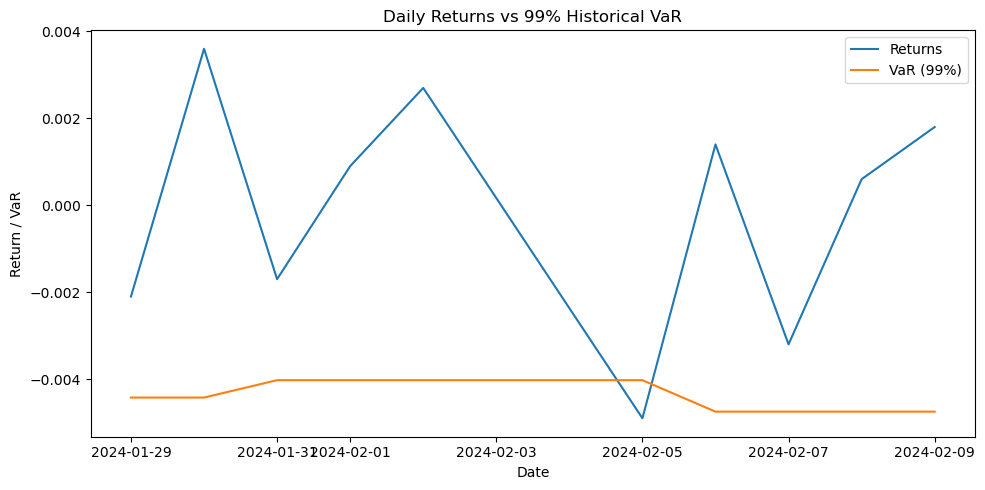

In [8]:
aligned_returns = returns.loc[hist_var_series.index]

plt.figure(figsize=(10, 5))
plt.plot(aligned_returns.index, aligned_returns.values, label="Returns")
plt.plot(hist_var_series.index, -hist_var_series.values, label="VaR (99%)")
plt.title("Daily Returns vs 99% Historical VaR")
plt.xlabel("Date")
plt.ylabel("Return / VaR")
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
generate_text_report(
    model_name="Historical VaR (99%)",
    alpha=alpha,
    num_exceptions=num_exceptions,
    kupiec_lr=lr_kupiec,
    traffic_light=zone,
    output_path=project_root / "reports" / "basel_backtest_report.md",
)
